In [5]:
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install glob
# %pip install pathlib

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import glob
from pathlib import Path
from IPython.display import Markdown

In [7]:
# Define party colors
party_colors = {
    'Aam Aadmi Party': '#009ADA',
    'All India Trinamool Congress': '#24B44C',
    'All India Majlis-E-Ittehadul Muslimeen': '#20783B',
    'Bahujan Samaj Party': '#22409A',
    'Bharatiya Janata Party': '#FF9933',
    'Communist Party of India': '#DE0000',
    'Communist Party of India (Marxist)': '#FF0000',
    'Communist Party of India (Marxist-Leninist) (Liberation)': '#CC0000',
    'Hindustani Awam Morcha (Secular)': '#DC143C',
    'Indian National Congress': '#166A2F',
    'Jammu & Kashmir National Conference': '#C8102E',
    'Jammu & Kashmir People Conference': '#00539B',
    'Jammu & Kashmir Peoples Democratic Party': '#016138',
    'Jan Suraaj Party': '#FFD700',
    'Janata Dal (United)': '#228B22',
    'Jharkhand Mukti Morcha': '#004B1F',
    'Lok Janshakti Party (Ram Vilas)': '#FFA500',
    'Nationalist Congress Party': '#0640AD',
    'Nationalist Congress Party – Sharadchandra Pawar': '#8B4513',
    'Rashtriya Janata Dal': '#008000',
    'Rashtriya Lok Morcha': '#FFB300',
    'Samajwadi Party': '#FE0000',
    'Shiv Sena': '#FF6634',
    'Shiv Sena (Uddhav Balasaheb Thackeray)': '#FF8C00',
}

In [8]:
results_dataset = "./results/2024Assembly-JK-new.csv"
df = pd.read_csv(results_dataset)

election_state = df.loc[0, 'election_state']
query_string = f"state_code == '{election_state}'"
election_state = pd.read_csv("states.csv").query(query_string).state_name.values[0]

election_year = df.loc[0, 'election_year']

print('='*50)
print(f"{election_year} {election_state} {df.loc[0, 'election_type']} Election Results")
print('='*50)

df['total_votes'] = df['evm_votes'] + df['postal_votes']
df.drop(['election_year', 'election_type'], axis=1, inplace=True)

display(df)

2024 Jammu & Kashmir Assembly Election Results


,election_state,constituency,constituency_no,serial_no,candidate,party,evm_votes,postal_votes,total_votes
0,JK,KARNAH,1,1,JAVAID AHMAD MIRCHAL,Jammu & Kashmir National Conference,14043,251,14294
1,JK,KARNAH,1,2,FIRDOUS AHMAD MIR,Jammu & Kashmir Peoples Democratic Party,6301,53,6354
2,JK,KARNAH,1,3,MOHD IDREES,Bharatiya Janata Party,2909,64,2973
3,JK,KARNAH,1,4,RAJA MANZOOR AHMAD KHAN,Jammu and Kashmir Apni Party,5047,104,5151
4,JK,KARNAH,1,5,SAJID AHMAD MIR,Bhim Sena,386,6,392
...,...,...,...,...,...,...,...,...,...
958,JK,MENDHAR(ST),90,6,MOHD ASHFAQ,Independent,13473,277,13750
959,JK,MENDHAR(ST),90,7,MOHD ASIF,Independent,281,3,284
960,JK,MENDHAR(ST),90,8,NAZIR HUSSAIN,Independent,275,14,289
961,JK,MENDHAR(ST),90,9,WASEEM HAYAT,Independent,378,1,379


In [9]:
top_n = 10

# Get top 2 candidates from each constituency
top_2_candidates = df.sort_values('total_votes', ascending=False).groupby('constituency_no').head(2)

# Create separate dataframes for winners and runners-up
winners = top_2_candidates.groupby('constituency_no').first().reset_index()
runners_up = top_2_candidates.groupby('constituency_no').last().reset_index()

# Combine winner and runner-up information
results_df = pd.DataFrame({
    'Constituency': winners['constituency'],
    'Constituency No': winners['constituency_no'],
    'Candidate (Winner)': winners['candidate'],
    'Votes (Winner)': winners['total_votes'],
    'Party (Winner)': winners['party'],
    'Candidate (Runner-up)': runners_up['candidate'],
    'Votes (Runner-up)': runners_up['total_votes'],
    'Party (Runner-up)': runners_up['party'],
    'Margin': winners['total_votes'] - runners_up['total_votes']
})

print('='*80)
print(f"Top {top_n} Winning Candidates by Victory Margin")
print('='*80)

results_df = results_df.sort_values('Margin', ascending=False).reset_index(drop=True)
display(results_df.head(top_n))

Top 10 Winning Candidates by Victory Margin


,Constituency,Constituency No,Candidate (Winner),Votes (Winner),Party (Winner),Candidate (Runner-up),Votes (Runner-up),Party (Runner-up),Margin
0,NAGROTA,77,DEVENDER SINGH RANA,48113,Bharatiya Janata Party,JOGINDER SINGH,17641,Jammu & Kashmir National Conference,30472
1,SAMBA,70,SURJEET SINGH SLATHIA,43182,Bharatiya Janata Party,RAVINDER SINGH,12873,Independent,30309
2,DOORU,41,GULAM AHMAD MIR,44270,Indian National Congress,MOHAMMAD ASHRAF MALIK,14542,Jammu & Kashmir Peoples Democratic Party,29728
3,JAMMU NORTH,79,SHAM LAL SHARMA,47219,Bharatiya Janata Party,AJAY KUMAR SADHOTRA,19856,Jammu & Kashmir National Conference,27363
4,AKHNOOR(SC),81,MOHAN LAL,49927,Bharatiya Janata Party,ASHOK KUMAR,25248,Indian National Congress,24679
5,MARH(SC),80,SURINDER KUMAR,42563,Bharatiya Janata Party,MULA RAM,19477,Indian National Congress,23086
6,JAMMU WEST,78,ARVIND GUPTA,41963,Bharatiya Janata Party,MANMOHAN SINGH,19836,Indian National Congress,22127
7,BILLAWAR,64,SATISH KUMAR SHARMA,44629,Bharatiya Janata Party,MANOHAR LAL SHARMA,23261,Indian National Congress,21368
8,POONCH HAVELI,89,AJAZ AHMED JAN,41807,Jammu & Kashmir National Conference,CHOUDHARY ABDUL GHANI,20928,Bharatiya Janata Party,20879
9,UDHAMPUR WEST,59,PAWAN KUMAR GUPTA,47164,Bharatiya Janata Party,SUMEET MAGOTRA,26412,Indian National Congress,20752


In [10]:
print('='*80)
print(f"Bottom {top_n} Winning Candidates by Victory Margin")
print('='*80)

display(results_df.sort_values('Margin', ascending=True).head(top_n))

Bottom 10 Winning Candidates by Victory Margin


,Constituency,Constituency No,Candidate (Winner),Votes (Winner),Party (Winner),Candidate (Runner-up),Votes (Runner-up),Party (Runner-up),Margin
89,TRAL,33,RAFIQ AHMAD NAIK,10710,Jammu & Kashmir Peoples Democratic Party,SURINDER SINGH,10250,Indian National Congress,460
88,KISHTWAR,49,SHAGUN PARIHAR,29053,Bharatiya Janata Party,SAJJAD AHMED KICHLOO,28532,Jammu & Kashmir National Conference,521
87,PATTAN,13,JAVAID RIYAZ,29893,Jammu & Kashmir National Conference,IMRAN RAZA ANSARI,29290,Jammu & Kashmir People Conference,603
86,INDERWAL,48,PAYARE LAL SHARMA,14195,Independent,GHULAM MOHD SAROORI,13552,Independent,643
85,HANDWARA,5,SAJAD GANI LONE,29812,Jammu & Kashmir People Conference,CHOWDRY MOHAMMAD RAMZAN,29150,Jammu & Kashmir National Conference,662
84,BANDIPORA,15,NIZAM UDDIN BHAT,20391,Indian National Congress,USMAN ABDUL MAJID,19580,Independent,811
83,DEVSAR,40,PEERZADA FEROZE AHAMAD,18230,Jammu & Kashmir National Conference,MOHAMMAD SARTAJ MADNI,17390,Jammu & Kashmir Peoples Democratic Party,840
82,GUREZ(ST),16,NAZIR AHMAD KHAN,8378,Jammu & Kashmir National Conference,FAQEER MOHAMMAD KHAN,7246,Bharatiya Janata Party,1132
81,SHOPIAN,37,SHABIR AHMAD KULLAY,14113,Independent,SHEIKH MOHAMMAD RAFI,12906,Jammu & Kashmir National Conference,1207
80,RAJOURI(ST),85,IFTKAR AHMED,28923,Indian National Congress,VIBOD KUMAR,27519,Bharatiya Janata Party,1404


In [11]:
# Calculate deposit loss status directly using transform
df['deposit_lost'] = df['total_votes'] < (df.groupby('constituency_no')['total_votes'].transform('sum') / 6)

# Find winners in each constituency
df['is_winner'] = df['total_votes'] == df.groupby('constituency_no')['total_votes'].transform('max')

print('='*50)
print(f"Candidates who had to forfeit their deposit")
print('='*50)

# Display some examples to verify
select_columns = ['constituency', 'constituency_no', 'candidate', 'serial_no', 'party', 'total_votes']
ffdeposit = df[df['deposit_lost'] == True]
ffdeposit = ffdeposit[select_columns]
display(ffdeposit)

Candidates who had to forfeit their deposit


,constituency,constituency_no,candidate,serial_no,party,total_votes
1,KARNAH,1,FIRDOUS AHMAD MIR,2,Jammu & Kashmir Peoples Democratic Party,6354
2,KARNAH,1,MOHD IDREES,3,Bharatiya Janata Party,2973
3,KARNAH,1,RAJA MANZOOR AHMAD KHAN,4,Jammu and Kashmir Apni Party,5151
4,KARNAH,1,SAJID AHMAD MIR,5,Bhim Sena,392
5,KARNAH,1,SAJAWAL SHAH,6,Samajwadi Party,735
...,...,...,...,...,...,...
958,MENDHAR(ST),90,MOHD ASHFAQ,6,Independent,13750
959,MENDHAR(ST),90,MOHD ASIF,7,Independent,284
960,MENDHAR(ST),90,NAZIR HUSSAIN,8,Independent,289
961,MENDHAR(ST),90,WASEEM HAYAT,9,Independent,379


In [12]:
# Calculate party-wise vote shares and other metrics
vote_shares = df.groupby('party').agg({
    'total_votes': 'sum',
    'deposit_lost': ['count', 'sum'],
    'is_winner': 'sum'
}).reset_index()

# Flatten multi-level columns
vote_shares.columns = ['Party', 'Votes Won', 'Total Candidates', 'Deposits Lost', 'Seats Won']

# Calculate percentages
total_votes = df['total_votes'].sum()
vote_shares['Vote Share %'] = (vote_shares['Votes Won'] / total_votes * 100).round(2)
vote_shares['Deposits Lost %'] = (vote_shares['Deposits Lost'] / vote_shares['Total Candidates'] * 100).round(2)
vote_shares = vote_shares.sort_values(['Seats Won', 'Votes Won'], ascending=False)
vote_shares.reset_index(drop=True, inplace=True)

# Set NOTA values to 0
vote_shares.loc[vote_shares['Party'] == 'None of the Above', ['Deposits Lost %', 'Deposits Lost', 'Seats Won', 'Total Candidates']] = 0
nota_position = vote_shares[vote_shares['Party'] == 'None of the Above'].index[0]
vote_shares = vote_shares[['Party', 'Total Candidates', 'Seats Won', 'Votes Won', 'Vote Share %', 'Deposits Lost', 'Deposits Lost %']]

# Sort by total votes and get display cutoff
print('=' * 50)
print(f"Party-wise Performance by Vote Share")
print('=' * 50)

display(vote_shares.head(nota_position+1).sort_values('Votes Won', ascending=False))

Party-wise Performance by Vote Share


,Party,Total Candidates,Seats Won,Votes Won,Vote Share %,Deposits Lost,Deposits Lost %
1,Bharatiya Janata Party,62,29,1462225,25.64,19,30.65
0,Jammu & Kashmir National Conference,56,42,1336147,23.43,2,3.57
2,Independent,346,7,948985,16.64,318,91.91
3,Indian National Congress,39,6,682666,11.97,13,33.33
4,Jammu & Kashmir Peoples Democratic Party,80,3,505948,8.87,57,71.25
8,Jammu and Kashmir Apni Party,46,0,191827,3.36,40,86.96
5,Jammu & Kashmir People Conference,20,1,141692,2.48,14,70.00
9,None of the Above,0,0,84397,1.48,0,0.00
6,Communist Party of India (Marxist),1,1,33634,0.59,0,0.00
7,Aam Aadmi Party,7,1,29733,0.52,6,85.71


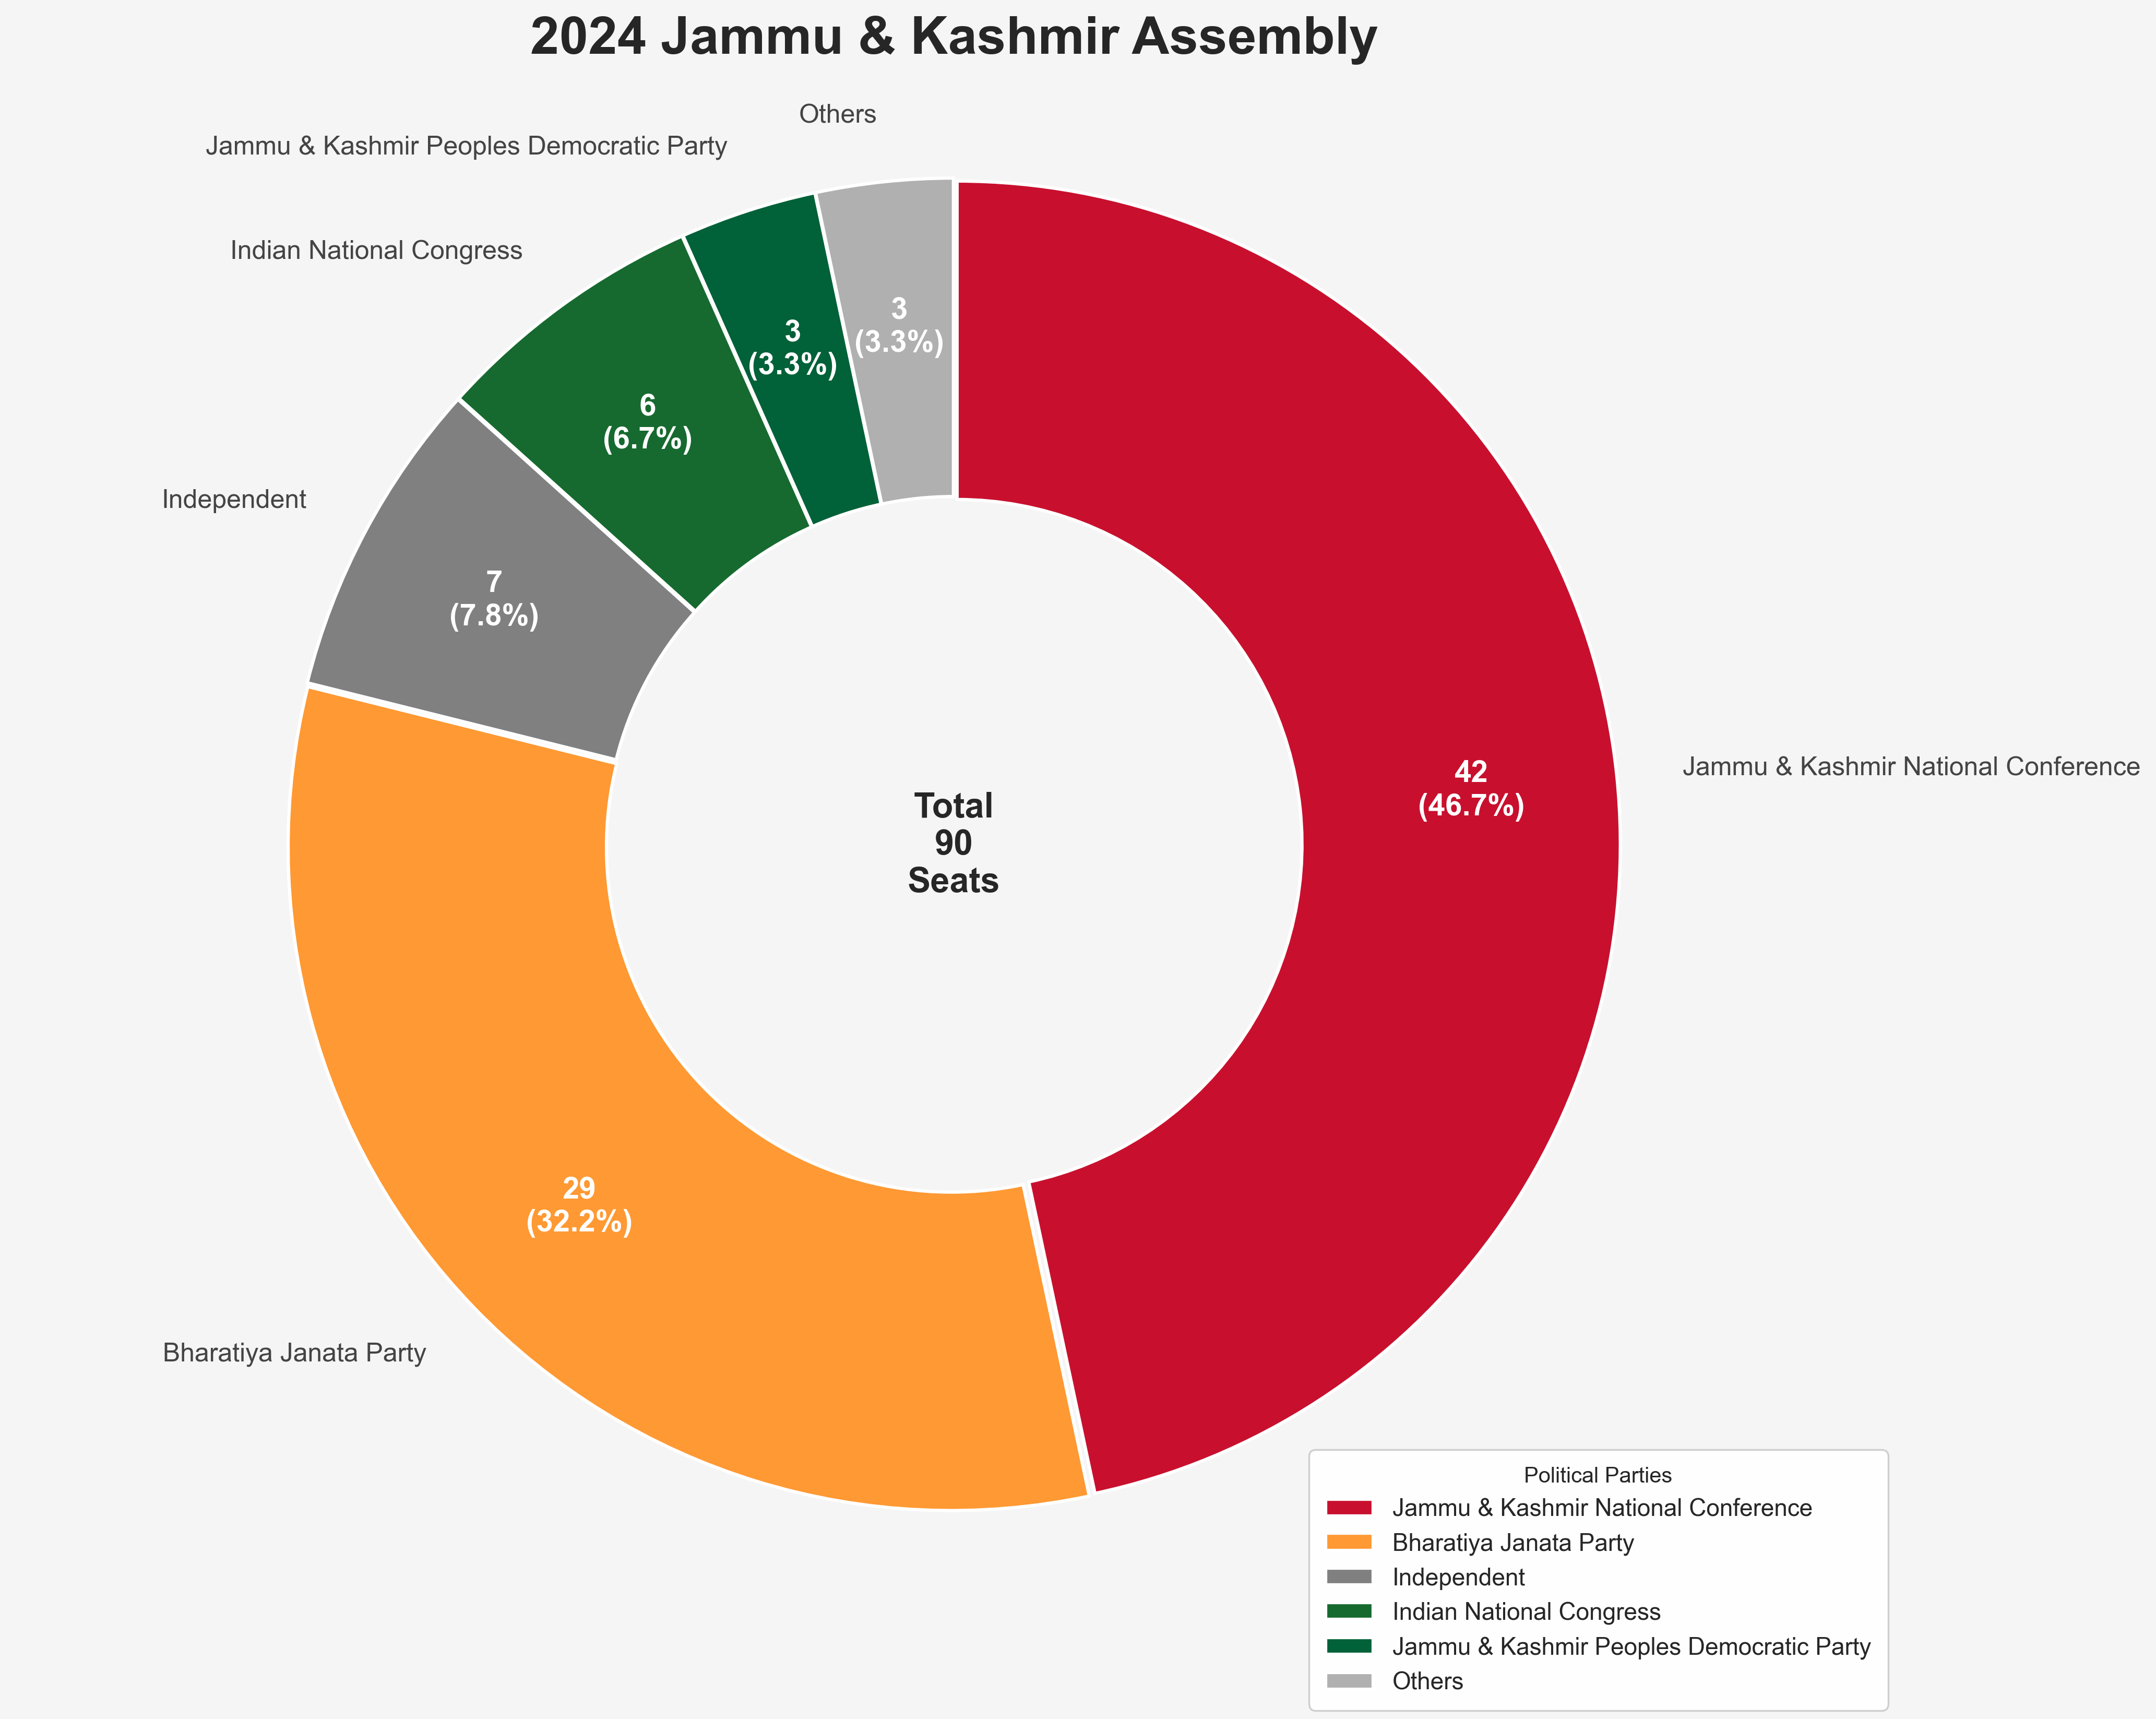

| Party                                    |   Seats Won |   Seat Share % |
|:-----------------------------------------|------------:|---------------:|
| Jammu & Kashmir National Conference      |          42 |          46.67 |
| Bharatiya Janata Party                   |          29 |          32.22 |
| Independent                              |           7 |           7.78 |
| Indian National Congress                 |           6 |           6.67 |
| Jammu & Kashmir Peoples Democratic Party |           3 |           3.33 |
| Jammu & Kashmir People Conference        |           1 |           1.11 |
| Communist Party of India (Marxist)       |           1 |           1.11 |
| Aam Aadmi Party                          |           1 |           1.11 |

In [13]:
# Build assembly composition and club small parties into "Others"
total_seats = len(results_df)
assembly_composition = vote_shares[vote_shares['Seats Won'] > 0].copy()
assembly_composition['Seat Share %'] = assembly_composition['Seats Won'] / total_seats * 100
small_mask = assembly_composition['Seat Share %'] <= 2.0
others_seats = assembly_composition.loc[small_mask, 'Seats Won'].sum()
assembly_summary = assembly_composition.loc[~small_mask].copy()
if others_seats > 0:
    assembly_summary = pd.concat(
        [
            assembly_summary,
            pd.DataFrame([
                {
                    'Party': 'Others',
                    'Seats Won': others_seats,
                    'Seat Share %': others_seats / total_seats * 100,
                }
            ]),
        ],
        ignore_index=True,
    )

colors = []
for party in assembly_summary['Party']:
    if party == 'Others':
        colors.append('#B0B0B0')
    else:
        colors.append(party_colors.get(party, '#808080'))

seats = assembly_summary['Seats Won'].tolist()

def make_autopct(seat_counts):
    def inner(pct):
        seat = seat_counts[inner.counter]
        inner.counter += 1
        autopct = f"{seat}"
        autopct += f"\n({pct:1.1f}%)" if pct > 3.0 else ''
        return autopct
    inner.counter = 0
    return inner

explode = [0.005] * len(seats)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14, 11), dpi=300)
patches, texts, autotexts = ax.pie(
    assembly_summary['Seats Won'],
    labels=assembly_summary['Party'],
    colors=colors,
    autopct=make_autopct(seats),
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.48, edgecolor='white', linewidth=1.5),
    pctdistance=0.78,
    explode=explode,
    textprops=dict(color='#111111', fontsize=13),
)

for text in texts:
    text.set_fontweight('light')
    text.set_fontsize(12)
    text.set_color('#444444')

for text in autotexts:
    text.set_fontsize(14)
    text.set_fontweight('bold')
    text.set_color('#FFFFFF')

ax.set_facecolor('#F5F5F5')
fig.patch.set_facecolor('#F5F5F5')
centre_circle = plt.Circle((0, 0), 0.33, color='#F5F5F5', zorder=0)
ax.add_artist(centre_circle)
plt.text(0, 0, f'Total\n{total_seats:,}\nSeats', ha='center', va='center', fontsize=16, fontweight='semibold')

legend = ax.legend(
    assembly_summary['Party'],
    title='Political Parties',
    loc='lower right',
    bbox_to_anchor=(1.0, -0.1),
    fontsize=11,
    frameon=True,
    facecolor='#FFFFFF',
    edgecolor='#CCCCCC',
)
legend.get_frame().set_boxstyle('round', pad=0.3)
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_linewidth(0.8)

plt.title(f"{election_year} {election_state} Assembly", pad=30, fontsize=24, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Numerical breakdown table for all parties
breakdown = vote_shares[vote_shares['Seats Won'] > 0].copy()
breakdown['Seat Share %'] = (breakdown['Seats Won'] / total_seats * 100).round(2)
breakdown = breakdown.sort_values('Seats Won', ascending=False)
breakdown = breakdown.reset_index(drop=True)
md_table = breakdown[['Party', 'Seats Won', 'Seat Share %']]
display(Markdown(md_table.to_markdown(index=False)))

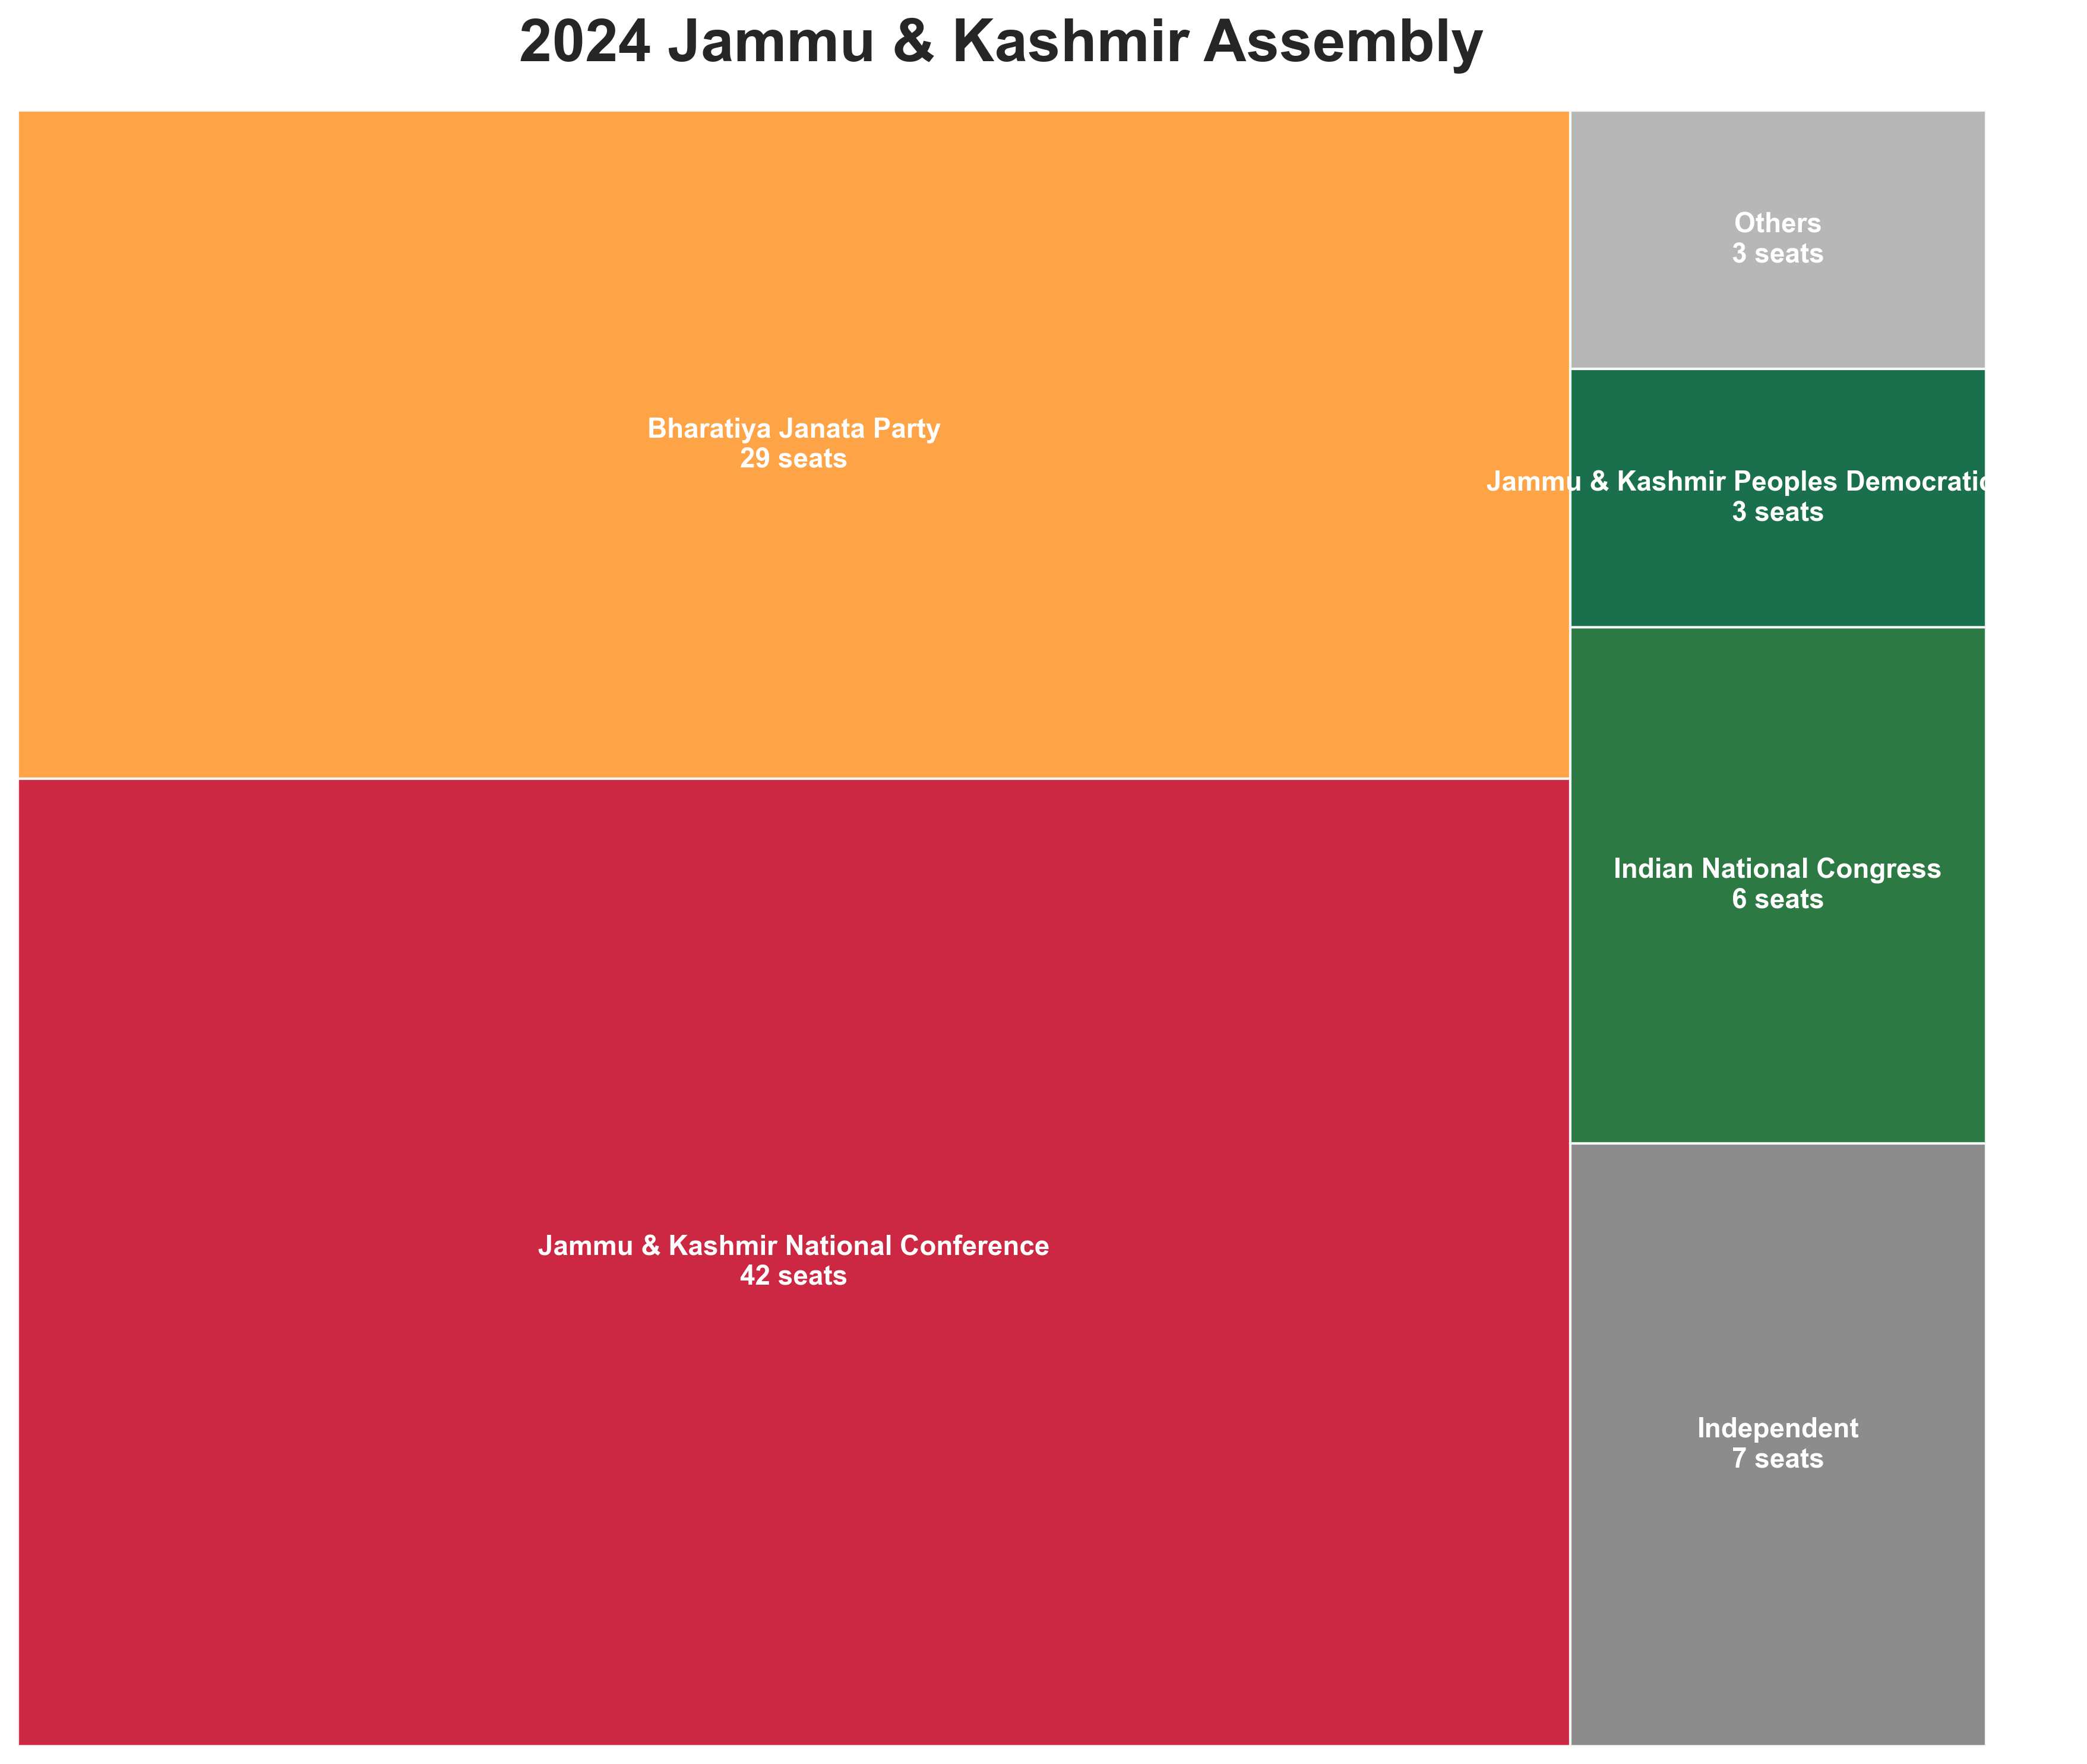

In [14]:
sizes = assembly_summary['Seats Won'].tolist()
labels = assembly_summary['Party'].tolist()
treemap_colors = colors

fig, ax = plt.subplots(figsize=(12, 10), dpi=300)

squarify.plot(
    sizes=sizes,
    label=[f"{party}\n{seats} seats" for party, seats in zip(labels, sizes)],
    color=treemap_colors,
    alpha=0.9,
    text_kwargs={'fontsize': 11, 'weight': 'bold', 'color': '#FFFFFF'}
)

ax.set_title(f"{election_year} {election_state} Assembly", pad=20, fontsize=24, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

In [15]:
# Get all Assembly CSV files from results directory
results_dir = Path('./results')
csv_files = glob.glob(str(results_dir / '*Assembly*.csv'))

# Read and concatenate all CSV files
df_master = pd.concat([pd.read_csv(f) for f in sorted(csv_files)], ignore_index=True)
df_master['total_votes'] = df_master['evm_votes'] + df_master['postal_votes']

print('='*60)
print(f"Master DataFrame of Assembly Election Results on India Votes Data")
print('='*60)

display(df_master)

Master DataFrame of Assembly Election Results on India Votes Data


,election_year,election_type,election_state,constituency,constituency_no,serial_no,candidate,party,evm_votes,postal_votes,total_votes
0,2024,Assembly,HR,KALKA,1.0,1,OM PARKASH GUJJAR,Aam Aadmi Party,854,4,858
1,2024,Assembly,HR,KALKA,1.0,2,CHARAN SINGH,Bahujan Samaj Party,1368,6,1374
2,2024,Assembly,HR,KALKA,1.0,3,PARDEEP CHAUDHARY,Indian National Congress,49544,185,49729
3,2024,Assembly,HR,KALKA,1.0,4,SHAKTI RANI SHARMA,Bharatiya Janata Party,60497,115,60612
4,2024,Assembly,HR,KALKA,1.0,5,AMIT SHARMA,Independent,582,0,582
...,...,...,...,...,...,...,...,...,...,...,...
19992,2025,Assembly,DL,KARAWAL NAGAR,NaN,12,H.M. HASHIM MALIK,Social Democratic Party Of India,491,0,491
19993,2025,Assembly,DL,KARAWAL NAGAR,NaN,13,AJAY SINGH NEGI,Independent,1002,4,1006
19994,2025,Assembly,DL,KARAWAL NAGAR,NaN,14,YOGESH SWAMY,Independent,228,1,229
19995,2025,Assembly,DL,KARAWAL NAGAR,NaN,15,VISHAL SHARMA,Independent,173,0,173
